# Credit Card Fraud Detection
By- Swati Pandey

<B>Abstract</B><br>
The advent of online transactions has its downsides too. Each year, millions of people all across the globe fall victim to credit card fraud leading to losses in billions of dollars. Therefore, it is the need of the hour to create algorithms that can accurately detect such fraudulent transactions by analysing the various details such as the time of the transaction, the amount transacted, the account numbers, etc. Putting data science and machine learning to good use.




# Our goal

Our goal in this project is to construct models Logistic Regression algorithm,Random Forest Algorithm , Decision Tree and XGBoost algorithm along with anomaly
detection to weed out the fraudulent transaction using a highly imbalance dataset obtained from kaggle.We'll also create visualizations to help us understand the structure of the data 

Understand the little distribution of the "little" data that was provided to us.
Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions.
Determine the Classifiers we are going to use and decide which one has a higher accuracy.



<B>what we are doing in our Analysis</B>

1. Perform EDA
2. Perform Adaptive Synthetic Sampling
3. Logistic Regression
4. XGBoost
5. Random Forest
6. Decision Tree


<B>About Data</B><br>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot get the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<B>Code and Observation</B>

Run commands on your anaconda prompt: pip install xgboost<br>
             pip install -U imbalanced-learn   

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score
from sklearn.metrics import auc, roc_curve, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
import itertools 
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
df.sample(frac=0.1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19649,30432.0,1.159125,0.185029,0.513046,0.453374,-0.169005,-0.174220,-0.051790,0.031032,-0.344646,...,-0.163746,-0.454376,0.136152,0.035770,0.139789,0.103301,-0.012527,0.008617,9.99,0
248107,153794.0,1.767551,-0.703259,-1.254646,0.138443,-0.128407,-0.225814,-0.014032,-0.015706,0.872420,...,-0.045225,-0.230363,0.149075,0.711759,-0.153521,-0.150143,-0.055489,-0.039380,124.42,0
274610,166115.0,2.016406,-1.090509,0.277027,-0.407911,-1.382215,0.531099,-1.654824,0.338484,0.406844,...,-0.063926,0.463536,0.315222,0.677508,-0.490687,-0.318588,0.096357,-0.021167,5.00,0
248441,153945.0,-0.880070,-0.020496,-1.495557,-1.243550,2.551380,3.361475,-0.841846,1.432510,0.478743,...,-0.151836,-0.396122,0.856931,0.558174,-0.932096,-0.314910,-0.175338,0.088771,3.70,0
84940,60531.0,0.979044,-0.604424,1.044718,-0.081276,-0.318319,1.973512,-1.075281,0.787837,0.899069,...,-0.059447,0.211470,0.191096,-0.939037,-0.202613,1.053202,0.034950,-0.009987,10.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21371,31626.0,1.167309,1.268213,-1.391088,1.722532,0.764173,-1.666059,0.710208,-0.282563,-0.487761,...,-0.147830,-0.292346,-0.113076,0.281655,0.713916,-0.297523,0.057199,0.098942,0.89,0
124943,77478.0,1.174990,-0.773886,-0.507490,-0.889672,1.279588,3.889390,-1.170819,1.041913,1.070061,...,-0.258484,-0.743621,0.002864,1.079768,0.277773,0.952778,-0.040437,0.015817,56.09,0
28626,35087.0,0.510169,-2.539631,0.176184,-1.613871,-2.020751,-0.279000,-0.415543,-0.145152,1.117873,...,-0.298099,-1.042499,-0.393458,-0.075449,0.236097,-0.201469,-0.002073,0.105052,466.16,0
103730,68777.0,-1.429824,-0.609750,1.309115,-0.822001,2.691737,-0.037847,-0.022195,0.145030,-0.501145,...,-0.148191,-0.722425,-0.088126,-1.720669,0.098102,0.022463,-0.172486,-0.130035,0.89,0


Most of the features of the data has been anonymized (V1 to V28) except the time of transaction,
its amount and whether it is fraudulent or not.




In [6]:
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<B>Data Visualisation</B>

Text(0, 0.5, 'Frequency')

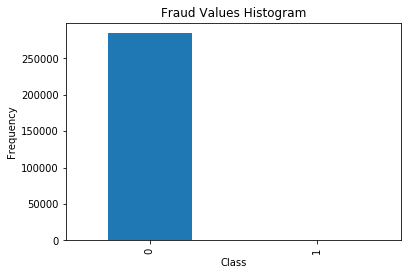

In [7]:
count = pd.value_counts(df['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
plt.title("Fraud Values Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

More than 99% of the transactions are non-fraudulent. So, our dataset is heavily imbalanced.

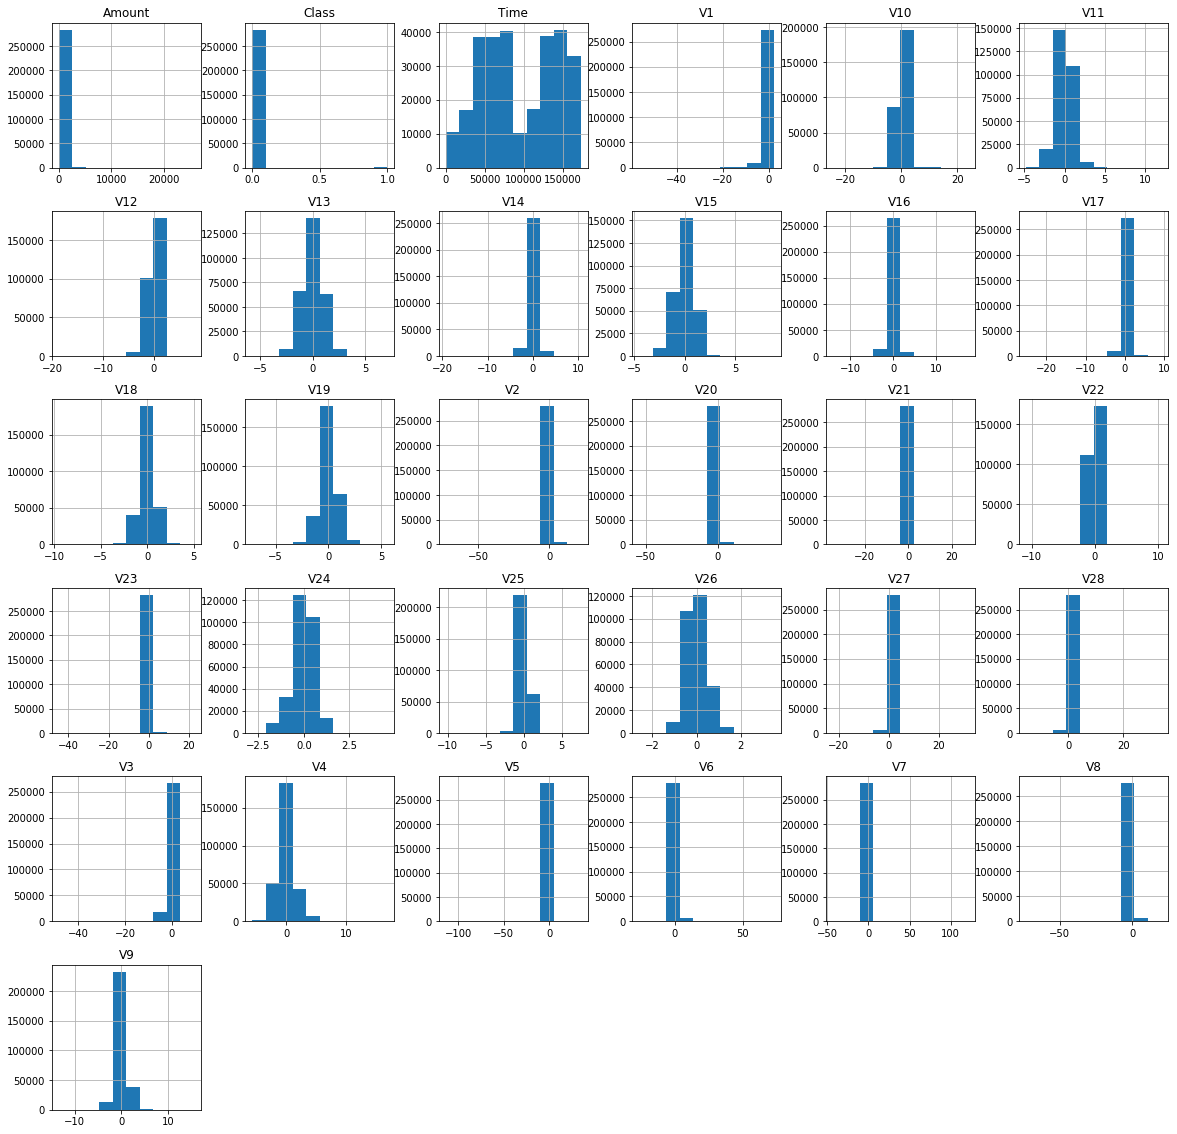

In [8]:
df.hist(figsize=(20,20))
plt.show()

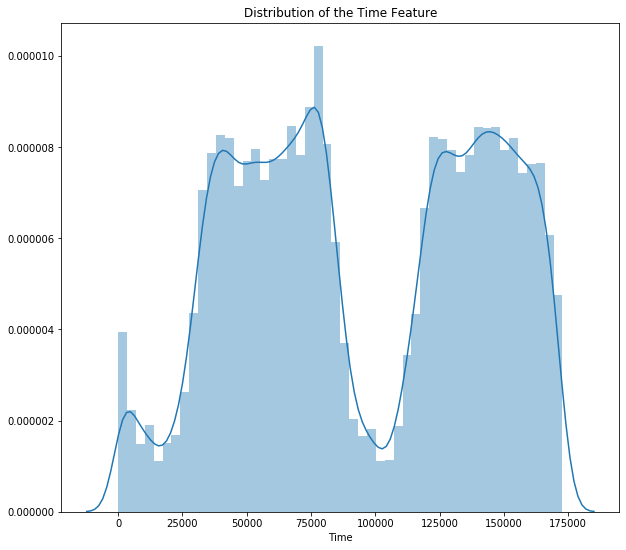

In [11]:
# visualising the time distribution
plt.figure(figsize=(10,9))
plt.title('Distribution of the Time Feature')
sns.distplot(df['Time'])

Observations:

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction

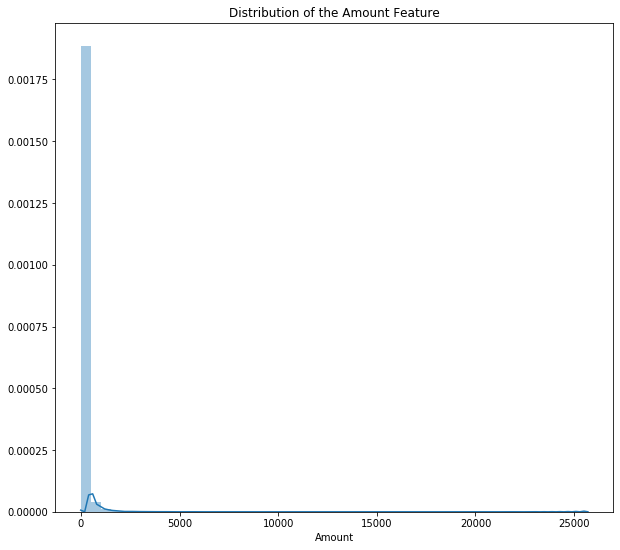

In [9]:
# Visualising the amount distribution
plt.figure(figsize=(10,9))
plt.title('Distribution of the Amount Feature')
sns.distplot(df['Amount'])

Observations:

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

Distribution of amounts of transactions for fraudulent samples has a shorter 
tail Fraudulent transactions, on average, are larger than non-fraudulent ones, 
so amount is an important feature!



<B>Let's perform EDA</B>

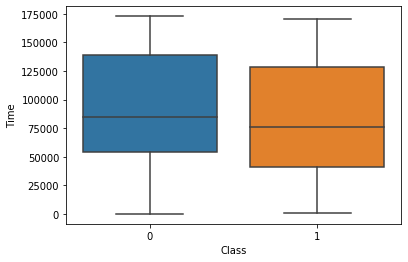

In [11]:
sns.boxplot(x="Class", y="Time",data=df)

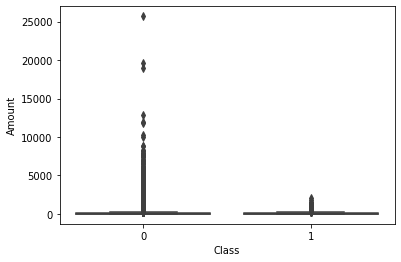

In [10]:
sns.boxplot(x="Class", y="Amount",data=df)

<B>Analysing Correlation</B>

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.


Text(0.5, 1, 'Heatmap of Correlation')

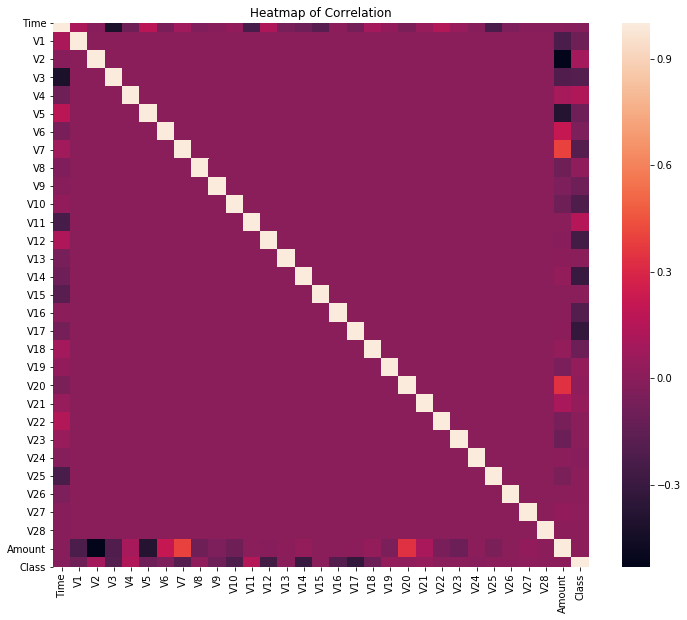

In [12]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')


<B><H7>V2 and V5 are negetively correlated, V20 and V7 are positively correlated</H7> </B>


Now we are using Random forest classifier on our unsampled data to compare it eventually with the same classifier used 
on resampled data

In [13]:
df_c = df.copy()
y = df_c.Class
X = df_c.drop(columns =['Class','Amount','Time']) #dropping time too
#  Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [14]:
random_forest = RandomForestClassifier(n_estimators=100)

In [15]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
random_forest.score(X_train,y_train)

1.0

In [18]:
random_forest.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
random_forest.score(X_test,y_test)

1.0

<B>Observation:</B>

We are getting 100% accuracy for both test and trained sample which implies our data is overfitting on the random forest model
because of large imbalance in data


<B> Scaling and Preprosessing </B>

we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

In [20]:
from sklearn import preprocessing


# scale the time column
scaler_time = preprocessing.StandardScaler().fit(df[['Time']])
scaled_time = scaler_time.transform(df[['Time']])
scaled_time = scaled_time.flatten()

# scale the amount column
scaler_amount = preprocessing.StandardScaler().fit(df[['Amount']])
scaled_amount = scaler_amount.transform(df[['Amount']])
scaled_amount = scaled_amount.flatten()

In [21]:
df.insert(0, "scaled_amount", scaled_amount, True)
df.insert(0, "scaled_time", scaled_time, True)

# delete the old time and amount columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

<B>Splitting the dataset into training and test data</B>

We have to separate the orginal dataframe. Why? for testing purposes, We are splitting the data when implementing Random OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [22]:
train, test = train_test_split(df, test_size=0.2)

In [23]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [24]:
X_train = train.loc[:,:'V28']
y_train = train.loc[:,'Class']

In [25]:
X_train

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.679599,-0.313289,1.166491,-0.131909,0.954278,1.038804,-0.558673,0.581644,-0.703867,0.310173,...,0.391657,-0.119038,-0.068807,-0.042513,-0.115607,-0.509273,0.482131,-0.373647,0.065138,0.018967
1,0.969678,-0.313249,2.383670,-0.954721,-2.473262,-1.714535,-0.112898,-1.308126,-0.022033,-0.555507,...,0.328626,-0.460350,0.152327,0.990687,-0.193402,-0.330661,0.659484,0.307434,-0.068945,-0.102289
2,-0.998753,-0.240643,-1.048792,1.306900,1.878985,0.634059,-0.480369,0.167067,0.006673,0.662036,...,0.768050,0.186636,0.039717,0.041085,-0.170260,-0.010517,0.272009,-0.357600,0.216422,0.080967
3,1.538221,-0.333279,-0.659560,0.472738,0.598847,-1.243978,0.080361,-0.440087,-0.037148,0.548462,...,-1.567174,-0.400618,0.385752,1.022518,-0.004194,0.733337,-0.806360,-0.609950,0.129229,0.161695
4,-0.109983,-0.335278,2.036316,-0.156055,-1.191692,0.232702,0.020245,-0.717724,0.042823,-0.138268,...,0.558791,-0.231165,-0.262991,-0.689954,0.292200,-0.350244,-0.304619,0.199767,-0.078916,-0.074016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,-0.532278,-0.316767,-1.641289,0.843124,0.683149,0.196963,0.064206,-0.635290,-0.151860,-0.295669,...,-0.385330,-0.539106,0.469578,-0.853185,0.720515,-0.020127,-0.089558,0.133013,0.191041,-0.067171
227841,-0.714850,-0.349271,1.256847,0.260977,0.279485,0.705764,-0.489386,-1.105204,-0.004217,-0.128340,...,-0.189273,-0.167315,-0.303317,-0.938029,0.145988,0.309035,0.171511,0.098930,-0.031588,0.027839
227842,-0.020865,-0.235006,-1.923281,1.451335,-1.108770,-0.137083,-0.221762,-1.237652,-0.071064,0.934040,...,-0.382560,-0.433268,-0.286790,-0.633665,0.069309,-0.166935,0.320731,-0.114756,-0.291479,-0.351994
227843,-0.653319,-0.083399,-0.738393,1.130444,1.770963,2.712081,-0.069138,1.904566,-0.257849,0.825374,...,1.118668,0.235838,0.032693,0.128902,-0.094194,-1.301772,-0.108348,0.300223,0.043971,0.061779


<I><B>Why do we need to over-Sample?</B></I>
In the beginning, we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

# (ADASYN )Adaptive Synthetic Technique

ADAptive SYNthetic (ADASYN) is based on the idea of adaptively generating minority data samples according to their distributions using K nearest neighbor. The algorithm adaptively updates the distribution and there are no assumptions made for the underlying distribution of the data.  The algorithm uses Euclidean distance for KNN Algorithm.ADASYN is an extension of SMOTE, The key difference between ADASYN and SMOTE is that the former uses a density distribution, as a criterion to automatically decide the number of synthetic samples that must be generated for each minority sample by adaptively changing the weights of the different minority samples to compensate for the skewed distributions. The latter generates the same number of synthetic samples for each original minority sample.


Check this link for more information: https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa

In [26]:
ad = ADASYN(n_neighbors=100)

X_train_res, y_train_res = ad.fit_resample(X_train, y_train)

In [27]:
train_res = np.concatenate((X_train_res, y_train_res.values.reshape((-1,1))), axis = 1)
np.random.shuffle(train_res)
train_res = pd.DataFrame(train_res, columns=train.columns)

Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

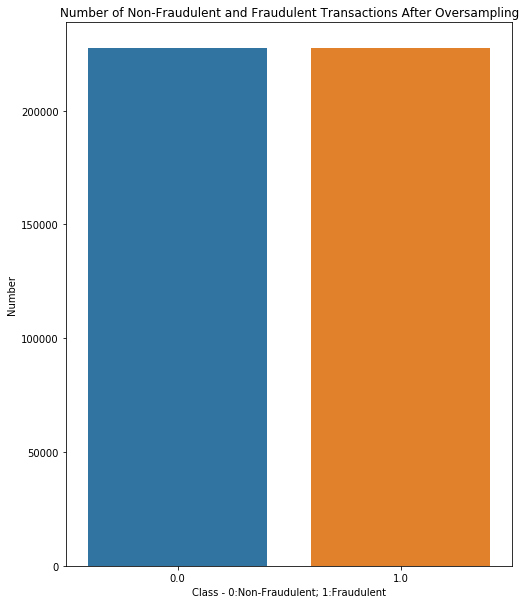

In [28]:
counts = train_res['Class'].value_counts()
plt.figure(figsize=(8,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions After Oversampling')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

<B>Outlier Detection and Removal</B>

In [29]:
corr = train_res.corr()
corr = corr[['Class']]


Let's compare the descriptive stats of the PCA variables V1-V28.

In [30]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [31]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000103,-0.000290,0.000022,0.001468,-0.001188,0.001053,0.000265,0.000058,0.000637,0.001068,...,0.000895,-0.000357,-0.000489,-0.000089,0.000880,0.000182,-0.000970,0.000606,0.000021,0.000239
std,1.960434,1.647538,1.516252,1.416368,1.383032,1.332477,1.240911,1.190501,1.100340,1.090785,...,0.813435,0.774870,0.730071,0.725249,0.624305,0.606290,0.521086,0.482415,0.406887,0.335110
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,...,-7.213527,-54.497720,-22.889347,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,-0.920791,-0.598915,-0.890722,-0.846662,-0.692015,-0.768551,-0.554192,-0.208117,-0.642386,-0.534580,...,-0.455456,-0.211510,-0.228203,-0.542453,-0.161562,-0.354649,-0.317172,-0.326565,-0.070746,-0.052910
50%,0.017993,0.063679,0.179494,-0.018653,-0.056185,-0.273043,0.039057,0.023272,-0.050817,-0.092302,...,0.004028,-0.062461,-0.029409,0.005869,-0.010720,0.040944,0.015407,-0.051730,0.001335,0.011311
75%,1.315432,0.803272,1.026083,0.745525,0.611361,0.398980,0.569882,0.328210,0.597671,0.454469,...,0.459190,0.133392,0.186577,0.528886,0.147749,0.440165,0.349401,0.242152,0.090965,0.078497
max,2.451888,21.467203,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,8.361985,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


Text(0.5, 1.0, 'V1-V28 Means')

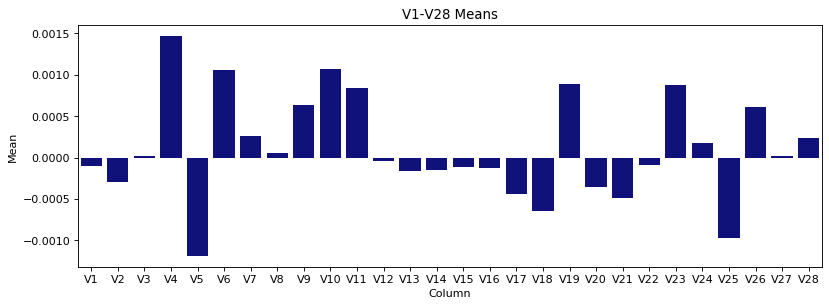

In [32]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

In [33]:
corr = train_res.corr()
corr = corr[['Class']]

In [34]:
# features with high negative correlations
corr[corr['Class'] < -0.4]

,Class
V3,-0.453899
V9,-0.433860
V10,-0.510600
V12,-0.551725
V14,-0.662434
V16,-0.420207


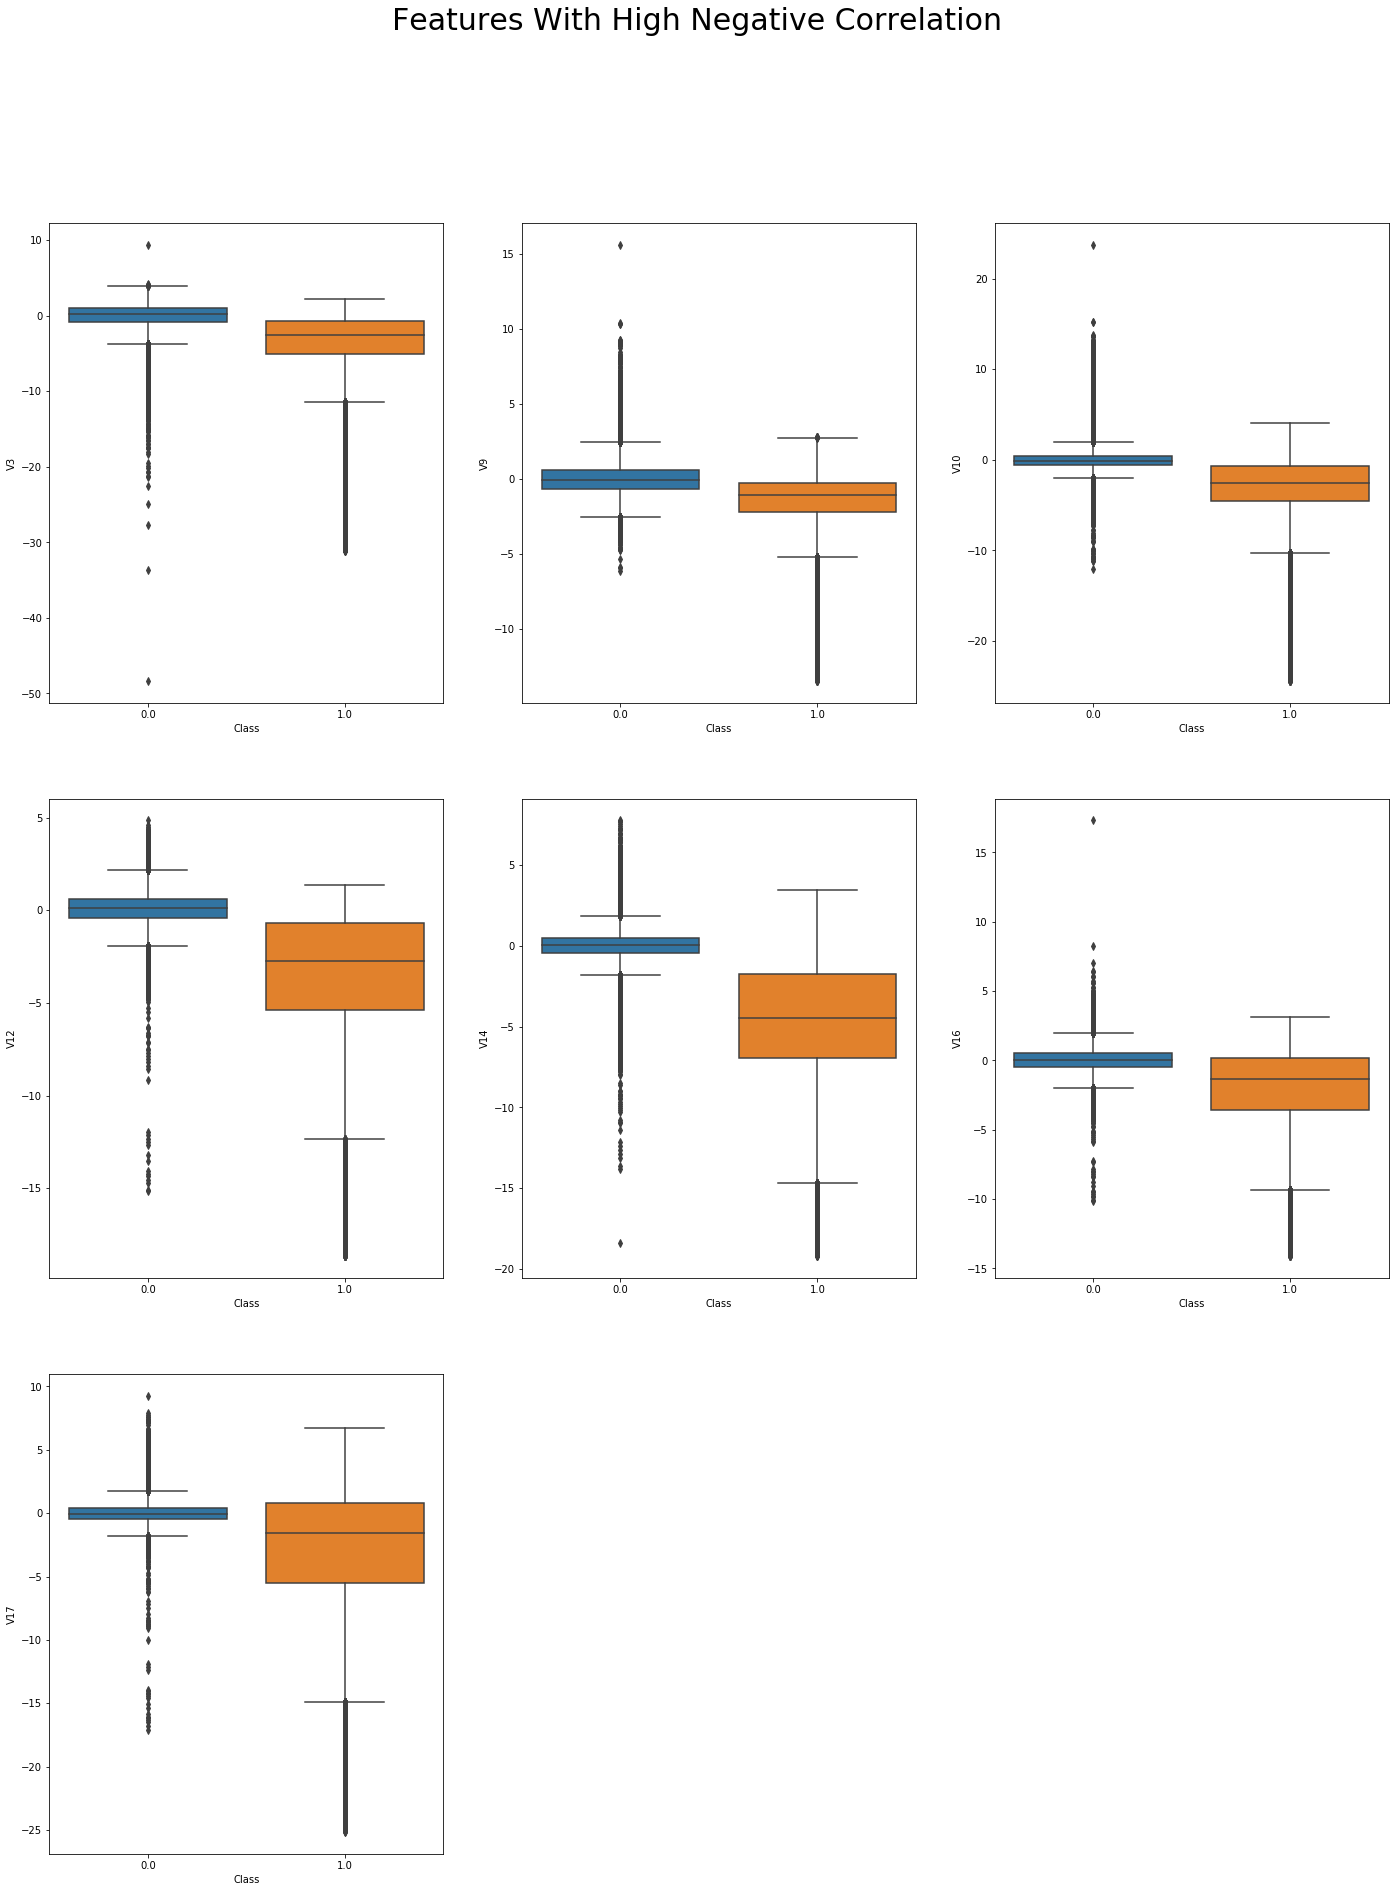

In [52]:
# box plot of the features with high negative correlation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 30))
fig.suptitle('Features With High Negative Correlation', size=30)
sns.boxplot(x="Class", y="V3", data=train_res, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=train_res, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=train_res, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=train_res, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=train_res, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=train_res, ax=axes[1,2])
sns.boxplot(x="Class", y="V17", data=train_res, ax=axes[2,0])
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

In [53]:
# features with high positive correlations
corr[corr.Class > 0.5]

,Class
V4,0.641990
V11,0.566404
Class,1.000000


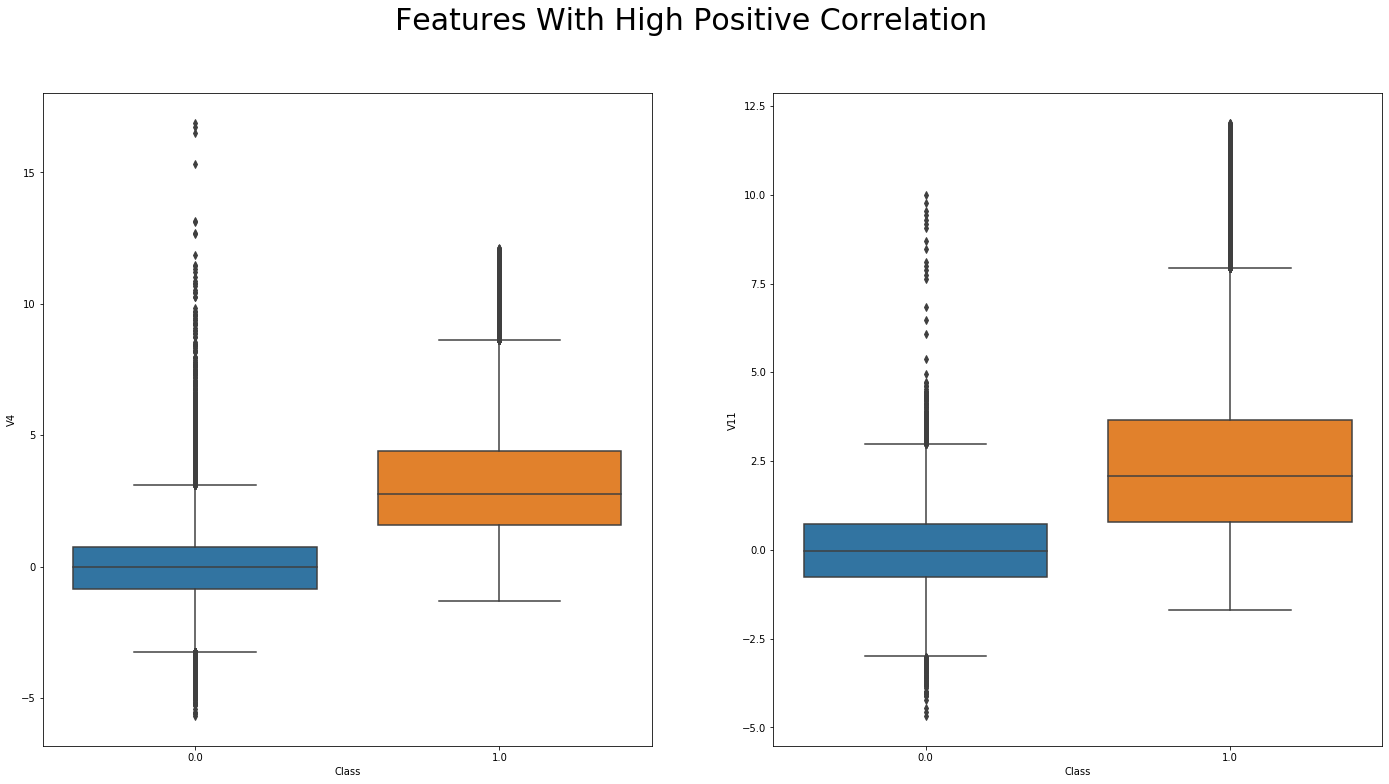

In [54]:
# box plot of the features with high positive correlation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
fig.suptitle('Features With High Positive Correlation', size=30)
sns.boxplot(x="Class", y="V4", data=train_res, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=train_res, ax=axes[1])

In [55]:
# removing extreme outliers
Q1 = train_res.quantile(0.25)
Q3 = train_res.quantile(0.75)
IQR = Q3 - Q1
train2 = train_res[~((train_res < (Q1-2.5*IQR)) | (train_res > (Q3+2.5*IQR))).any(axis=1)]

We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

In [56]:
len_after = len(train2)
len_before = len(train_res)
len_diff = len(train_res) - len(train2)
print('We reduced our data size from {} observations by {} observations to {} observations.'.format(len_before, len_diff, len_after))

We reduced our data size from 454907 observations by 135209 observations to 319698 observations.


Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

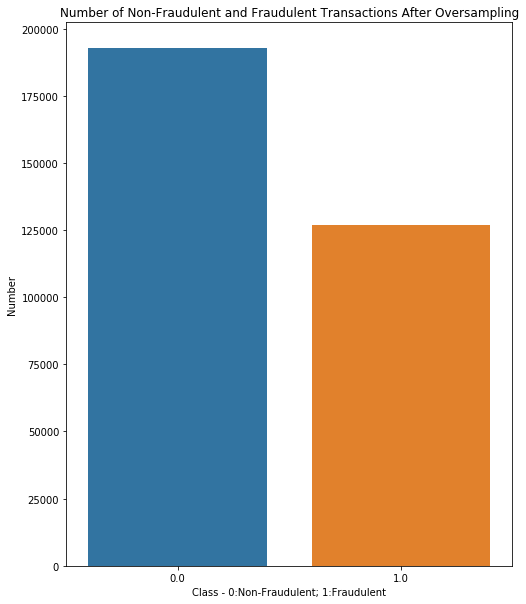

In [57]:
counts = train2['Class'].value_counts()
plt.figure(figsize=(8,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions After Oversampling')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')

In [58]:
train2.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
2,0.191421,-0.343850,0.042297,1.326587,0.292316,1.876684,1.151301,-0.336823,1.121114,-0.181786,...,-0.173681,0.111901,0.436674,-0.094233,0.420783,-0.377131,-0.263837,-0.037356,-0.005676,1.0
3,0.115282,-0.033809,-1.636903,0.325020,0.888269,1.580040,-0.157625,0.599830,-0.630691,-0.482018,...,-0.511992,0.655765,0.728467,-0.172582,-0.129615,-0.360609,-0.319745,-0.400465,-0.111094,1.0
4,-0.261373,-0.243659,0.473572,-0.126989,-0.016950,0.503673,-0.274021,0.289621,-1.182838,-0.224827,...,0.120853,-0.225658,0.349598,-0.248342,-0.600125,0.469491,0.945837,0.006939,0.053273,1.0
5,0.566988,-0.302973,-0.186177,1.131011,-0.438980,-0.680089,0.961540,-0.509776,0.901131,0.024419,...,0.197097,-0.297905,-0.647125,0.126298,0.615278,-0.403728,0.095111,0.331467,0.145181,0.0
10,-0.225668,-0.349231,-1.074402,1.180813,-0.715003,1.437959,2.209665,-2.321539,0.095921,-0.436255,...,-0.122047,-0.469032,-0.786271,-0.837776,0.152501,0.072576,-0.554433,0.050169,0.159467,1.0


A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.


In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

Now for our case recall will be a better option because number of normal transacations are very high as compared to the number of fraud cases and sometime a fraud case will be predicted as normal.

In [61]:
# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [62]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [63]:
subtrain2 = train2.sample(20000)
X_train = subtrain2.loc[:,:'V28']
y_train = subtrain2.loc[:,'Class']
X_test = test.loc[:,:'V28'].values
y_test = test.loc[:,'Class'].values

In [64]:
X_train= np.array(X_train.to_numpy())
y_train= np.array(y_train.to_numpy())
type(X_train)

numpy.ndarray

<B> LogisticRegression </B>

C:\Users\patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


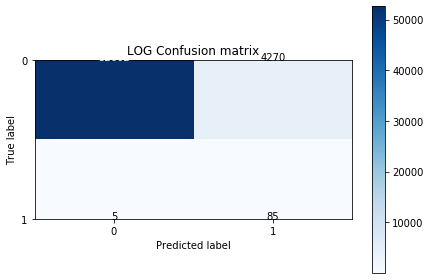

Precision =     0.020
Recall    =     0.944
F1_score  =     0.038


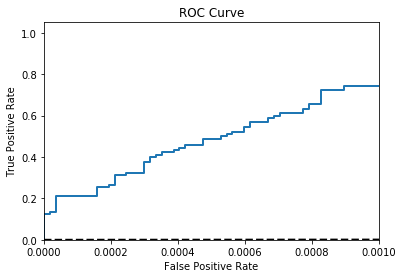

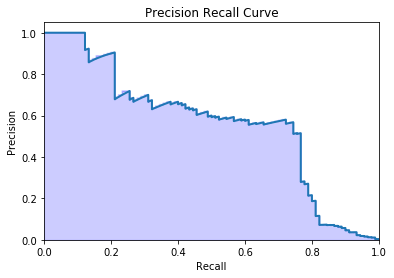

In [65]:
log_cfl = LogisticRegression()

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)  

print("Testing accuracy for Logistic Regression: {:.2f}%".format(100 * rf_cfl.score(X_test,y_test)))
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

Understanding the graph
Average precision calculated here is the area under the precision-recall curve which is also called as average precision.
The dot in the graph are the default threshold values which is always equal to 0.5 for trees.

In [66]:
# Show parameters currently use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(log_cfl.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [67]:
# Find the best parameters : recall optimisation
from sklearn.model_selection import GridSearchCV
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(X_train, y_train)

best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s


The best parameters for using this model is {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.9s finished
C:\Users\patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


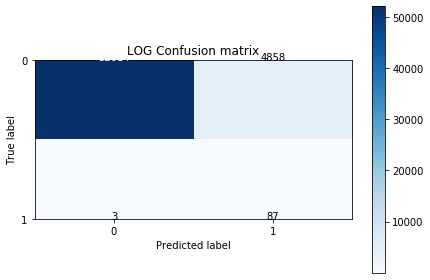

Precision =     0.018
Recall    =     0.967
F1_score  =     0.035


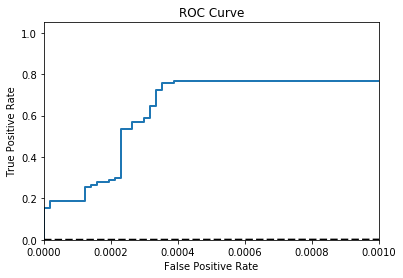

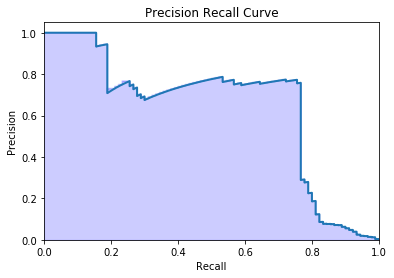

In [68]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)

print("Testing accuracy for Logistic Regression: {:.2f}%".format(100 * rf_cfl.score(X_test,y_test)))
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

plt.savefig('4.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds

<B>XGBoost</B>

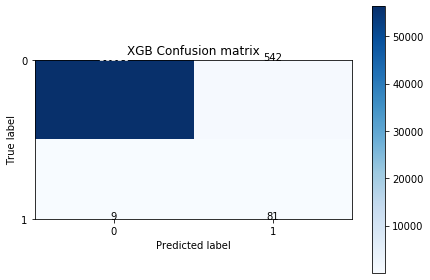

Precision =     0.130
Recall    =     0.900
F1_score  =     0.227


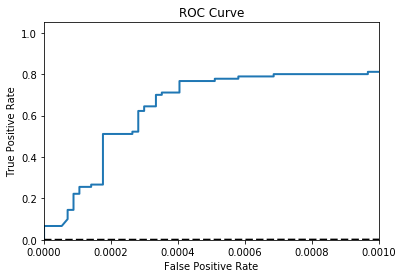

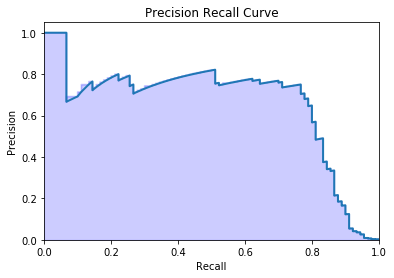

In [73]:
# xgb
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

xgb_cfl.fit(X_train, y_train)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

print("Testing accuracy for XGBoost: {:.2f}%".format(100 * rf_cfl.score(X_test,y_test)))
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='XGB Confusion matrix')
plt.show()
show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()


In [74]:
param_grid = {
            'n_estimators': [100, 200, 300, 400]
              }

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=100, total=   2.4s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ................................. n_estimators=100, total=   2.4s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   2.6s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   2.6s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   2.5s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   4.4s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   4.0s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   3.0s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished


The best parameters for using this model is {'n_estimators': 400}


<B>Random Forest</B>

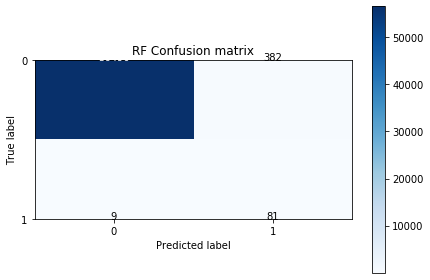

Precision =     0.175
Recall    =     0.900
F1_score  =     0.293


In [70]:
# Ramdom forest Classifier
rf_cfl = RandomForestClassifier(n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

print("Testing accuracy for Random Forest: {:.2f}%".format(100 * rf_cfl.score(X_test,y_test)))
# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.show()

show_metrics()

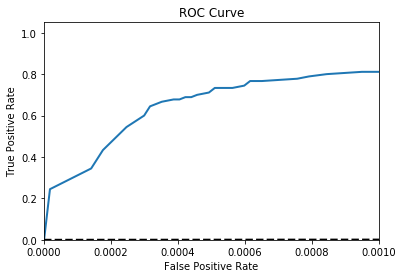

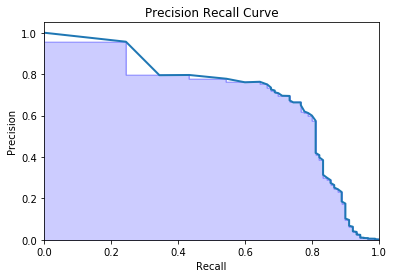

In [71]:
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

RF - Grid Search CV to optimise F1_score

In [72]:
#from sklearn.model_selection import GridSearchCV

param_grid = {
            'n_estimators': [100, 200, 500],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
            }

CV_rnd_cfl = GridSearchCV(estimator = rf_cfl, param_grid = param_grid, scoring = 'f1', verbose = 10, n_jobs = -1)
CV_rnd_cfl.fit(X_train, y_train)

best_parameters = CV_rnd_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6

The best parameters for using this model is {'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


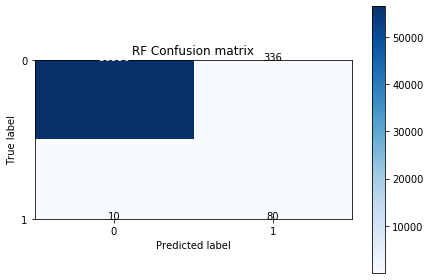

Precision =     0.192
Recall    =     0.889
F1_score  =     0.316


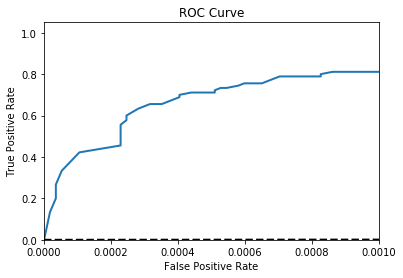

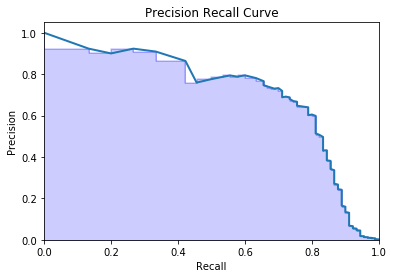

In [75]:
rf_cfl = RandomForestClassifier(n_estimators = 200, 
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

print("Testing accuracy for Random Fo: {:.2f}%".format(100 * rf_cfl.score(X_test,y_test)))
# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.savefig('3.rf_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_rf, tpr_rf, t_rf = fpr, tpr, t
precision_rf, recall_rf, thresholds_rf = precision, recall, thresholds


<B>DecisionTreeClassifier</B>

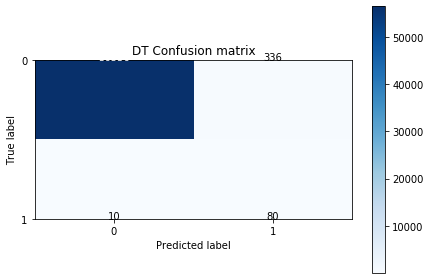

Precision =     0.192
Recall    =     0.889
F1_score  =     0.316
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56872
           1       0.19      0.89      0.32        90

    accuracy                           0.99     56962
   macro avg       0.60      0.94      0.66     56962
weighted avg       1.00      0.99      1.00     56962

Confusion matrix:
 [[56536   336]
 [   10    80]]


In [76]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]
# Obtain model predictions
#y_predicted = model.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_pred)

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'DT Confusion matrix')
plt.show()

show_metrics()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))

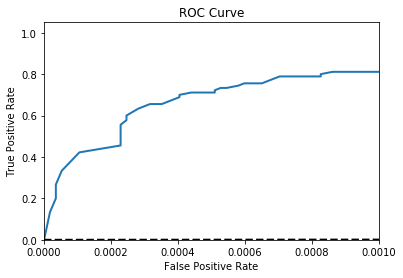

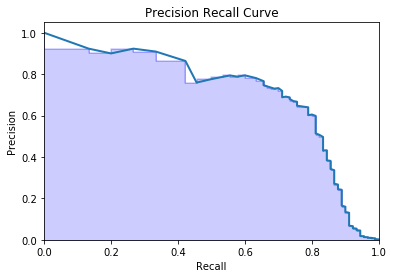

In [77]:
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

<B> Conclusion </B>

We were able to accurately identify fraudulent credit card transactions using a random forest model. We found that the five variables most correlated with fraud are, in decreasing order, V17, V14, V10, V12, and V11. Only a few preprocessing steps were necessary before constructing predictive models:

Split the data using a random, stratified train/test split with a test size of 20%



We used Logistic Regression, XGBoost, Random Forest and Decision Tree as our training models and implemented them to get confusion matrix, recall value and ROC score.

The greater the precision value and lesser the recall, the better fit we get.

As per the notebook, the Accuracy of Logistic regression worked fine but the prediction value was less and recall was high.
In XGBoost, prediction value improved so does the recall value.
In Random Forest, the prediction value is better than logistic regression that is 0.175. 
So Random Forest and Decision tree has same accuracy as 0.17.

Decision Tree is the best model for our dataset!!